In [14]:
graph = {
    'Oradea':{'Zerind':71,'Sibiu':151},
    'Zerind':{'Arad':75,'Oradea':71},
    'Arad':{'Timisoara':118,'Sibiu':140,'Zerind':75},
    'Sibiu':{'Fagaraw':99,'Rimnicu Vilcea':80,'Oradea':151,'Arad':140},
    'Timisoara':{'Lugoj':111,'Arad':118},
    'Lugoj':{'Timisoara':111,'Mehadia':70},
    'Rimnicu Vilcea':{'Sibiu':80,'Craiova':146,'Pitesti':97},
    'Mehadia':{'Lugoj':70,'Drobeta':75},
    'Drobeta':{'Mehadia':75,'Craiova':120},
    'Pitesti':{'Rimnicu Vilcea':97,'Craiova':138,'Bucharest':101},
    'Craiova':{'Drobeta':120,'Rimnicu Vilcea':146,'Pitesti':138},
    'Fagaraw':{'Sibiu':99,'Bucharest':211},
    'Bucharest':{'Pitesti':101,'Giurgin':90,'Fagaraw':211,'Urziceni':85},
    'Giurgin':{'Bucharest':90},
    'Urziceni':{'Bucharest':85,'Hirsova':98,'Vaslui':142},
    'Eforie':{'Hirsova':86},
    'Hirsova':{'Eforie':86,'Urziceni':98},
    'Vaslui':{'Urziceni':142,'Iasi':92},
    'Iasi':{'Vaslui':92,'Neamt':87},
    'Neamt':{'Iasi':87}
}


import heapq

def dijkstra(graph,start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    heap = [(0,start)]

    while heap:
        curr_dist, curr_node = heapq.heappop(heap)
        
        if curr_dist > distances[curr_node]:
            continue

        for neighbor, weight in graph[curr_node].items():
            distance = curr_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(heap,(distance,neighbor))
    return distances

dijkstra(graph=graph,start='Arad')




{'Oradea': 146,
 'Zerind': 75,
 'Arad': 0,
 'Sibiu': 140,
 'Timisoara': 118,
 'Lugoj': 229,
 'Rimnicu Vilcea': 220,
 'Mehadia': 299,
 'Drobeta': 374,
 'Pitesti': 317,
 'Craiova': 366,
 'Fagaraw': 239,
 'Bucharest': 418,
 'Giurgin': 508,
 'Urziceni': 503,
 'Eforie': 687,
 'Hirsova': 601,
 'Vaslui': 645,
 'Iasi': 737,
 'Neamt': 824}

In [17]:
graph = {
    'Oradea':{'Zerind':71,'Sibiu':151},
    'Zerind':{'Arad':75,'Oradea':71},
    'Arad':{'Timisoara':118,'Sibiu':140,'Zerind':75},
    'Sibiu':{'Fagaraw':99,'Rimnicu Vilcea':80,'Oradea':151,'Arad':140},
    'Timisoara':{'Lugoj':111,'Arad':118},
    'Lugoj':{'Timisoara':111,'Mehadia':70},
    'Rimnicu Vilcea':{'Sibiu':80,'Craiova':146,'Pitesti':97},
    'Mehadia':{'Lugoj':70,'Drobeta':75},
    'Drobeta':{'Mehadia':75,'Craiova':120},
    'Pitesti':{'Rimnicu Vilcea':97,'Craiova':138,'Bucharest':101},
    'Craiova':{'Drobeta':120,'Rimnicu Vilcea':146,'Pitesti':138},
    'Fagaraw':{'Sibiu':99,'Bucharest':211},
    'Bucharest':{'Pitesti':101,'Giurgin':90,'Fagaraw':211,'Urziceni':85},
    'Giurgin':{'Bucharest':90},
    'Urziceni':{'Bucharest':85,'Hirsova':98,'Vaslui':142},
    'Eforie':{'Hirsova':86},
    'Hirsova':{'Eforie':86,'Urziceni':98},
    'Vaslui':{'Urziceni':142,'Iasi':92},
    'Iasi':{'Vaslui':92,'Neamt':87},
    'Neamt':{'Iasi':87}
}

import heapq

def ucs(graph,start,goal):
    heap = [(0,start,[])]

    while heap:
        curr_cost,curr_node,path = heapq.heappop(heap)

        if curr_node==goal:
            return path+[curr_node]
        
        for neighbor, weight in graph[curr_node].items():
            heapq.heappush(heap, (curr_cost + weight, neighbor, path + [curr_node]))
    
    return None


print(ucs(graph=graph,start='Arad',goal='Giurgin'))    

['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest', 'Giurgin']


In [25]:
import math
from queue import PriorityQueue

def heuristic(a, b, nodes):
    ax, ay = nodes[a]
    bx, by = nodes[b]
    return math.sqrt((bx-ax)**2 + (by-ay)**2)

def astar_search(start, goal, edges, nodes):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()

        if current == goal:
            break

        for next_node in edges[current]:
            new_cost = cost_so_far[current] + edges[current][next_node]
            if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                cost_so_far[next_node] = new_cost
                priority = new_cost + \
                    heuristic(next_node, goal, nodes)
                frontier.put(next_node, priority)
                came_from[next_node] = current

    return came_from, cost_so_far


if __name__ == '__main__':
    nodes = {
        'A': (0, 0),
        'B': (0, 2),
        'C': (2, 0),
        'D': (2, 2),
        'E': (4, 0),
        'F': (4, 2),
        'G': (6, 1)
    }
    edges = {
        'A': {'B': 2, 'C': 5},
        'B': {'A': 2, 'D': 3},
        'C': {'A': 5, 'D': 2, 'E': 4},
        'D': {'B': 3, 'C': 2, 'F': 1},
        'E': {'C': 4, 'F': 3},
        'F': {'D': 1, 'E': 3, 'G': 2},
        'G': {'F': 2}
    }
    start = 'A'
    goal = 'G'
    came_from, cost_so_far = astar_search(start, goal, edges, nodes)

    # Print the shortest path found
    path = [goal]
    node = goal
    while node != start:
        node = came_from[node]
        path.append(node)
    path.reverse()
    print(path)
    print("Cost is " + str(cost_so_far[goal]))


['A', 'B', 'D', 'F', 'G']
Cost is 8


In [16]:
import heapq
def hill_climbing(start, goal, heuristic):
    visited = set()
    heap = []
    heapq.heappush(heap, (heuristic[start], 0, [start]))
    while heap:
        _, cost, path = heapq.heappop(heap)
        current = path[-1]

        if current == goal:
            return path, cost

        visited.add(current)

        for neighbor, distance in graph[current]:
            if neighbor not in visited:
                new_path = path + [neighbor]
                new_cost = cost + distance
                heapq.heappush(heap, (heuristic[neighbor], new_cost, new_path))

    return None, None

graph = {
    "Arad": [("Zerind", 75), ("Sibiu", 140), ("Timisoara", 118)],
    "Zerind": [("Arad", 75), ("Oradea", 71)],
    "Oradea": [("Zerind", 71), ("Sibiu", 151)],
    "Sibiu": [("Arad", 140), ("Oradea", 151), ("Fagaras", 99), ("Rimnicu Vilcea", 80)],
    "Timisoara": [("Arad", 118), ("Lugoj", 111)],
    "Lugoj": [("Timisoara", 111), ("Mehadia", 70)],
    "Mehadia": [("Lugoj", 70), ("Drobeta", 75)],
    "Drobeta": [("Mehadia", 75), ("Craiova", 120)],
    "Craiova": [("Drobeta", 120), ("Rimnicu Vilcea", 146), ("Pitesti", 138)],
    "Rimnicu Vilcea": [("Sibiu", 80), ("Craiova", 146), ("Pitesti", 97)],

    "Fagaras": [("Sibiu", 99), ("Bucharest", 211)],
    "Pitesti": [("Rimnicu Vilcea", 97), ("Craiova", 138), ("Bucharest", 101)],
    "Bucharest": [("Fagaras", 211), ("Pitesti", 101)]
}


heuristic = {
    "Arad": 366,
    "Bucharest": 0,
    "Craiova": 0,
    "Drobeta": 22,
    "Fagaras": 18,
    "Lugoj": 2,
    "Mehadia": 21,
    "Oradea": 0,
    "Pitesti": 54,
    "Rimnicu Vilcea": 193,
    "Sibiu": 54,
    "Timisoara": 42,
    "Zerind": 374
}

start = "Arad"
goal = "Bucharest"
path, cost = hill_climbing(start, goal, heuristic)

if path is None:
    print(f"No path found from {start} to {goal}")
else:
    print(f"Path: {path}")
    print(f"Cost: {cost}")

Path: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Cost: 450


Solution: (0.0034578671496032776, -8.044046313493425e-06) Objective value: 9.999988043090069


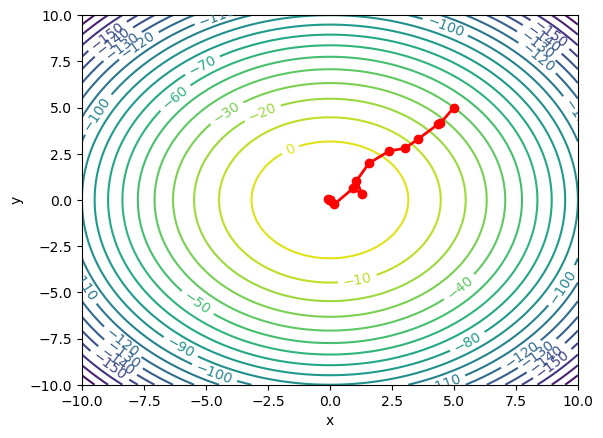

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

def objective_function(x, y):
    return -x**2 - y**2 + 10

def random_neighbor(x, y, step_size):
    return x + random.uniform(-step_size, step_size), y + random.uniform(-step_size,
    step_size)

def hill_climbing(initial, step_size, max_iterations):
    current = initial
    solution_history = [current]
    for i in range(max_iterations):
        candidate = random_neighbor(*current, step_size)
        if objective_function(*candidate) > objective_function(*current):
            current = candidate
            solution_history.append(current)
        else:
            for j in range(10):
                candidate = random_neighbor(*current, step_size)
                if objective_function(*candidate) > objective_function(*current):
                    current = candidate
                    solution_history.append(current)
                    break
    return current, solution_history

# Example usage
initial = (5, 5)

step_size = 1
max_iterations = 1000
solution, solution_history = hill_climbing(initial, step_size, max_iterations)
print(f"Solution: {solution} Objective value: {objective_function(*solution)}")

# Create a contour plot of the objective function
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)
fig, ax = plt.subplots()
contour_set = ax.contour(X, Y, Z, levels=20)
ax.clabel(contour_set)
ax.set_xlabel('x')
ax.set_ylabel('y')
# Overlay the solution points on the plot
solution_history = np.array(solution_history)
ax.plot(solution_history[:, 0], solution_history[:, 1], '-o', color='red', linewidth=2)
plt.show()